### Import  library

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [137]:
df = pd.read_csv("Zomato data .csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### Data Processing

#### Converte the data type of column --rate

In [138]:
def handleRate(value):
    value = str(value).split("/")
    value = value[0]
    return float(value)

df["rate"] = df["rate"].apply(handleRate)

#### To change Columns Name

In [139]:
df.rename(columns={"name":"res_name"},inplace = True)


#### To Cheack Data Set Contain null Value and Duplicat Value

In [140]:
#  To Cheack Data set contain null value or not
df.isnull().sum()

# To cheack dataset contain duplicate row 
df.duplicated().sum()

# Observation : Data set does not contain any null and duplicates values

0

### About Data Information 

In [141]:
df.shape 
df.columns
df.info()

# Observation :

#  Shape Of Given data set is 147 rows and 7 columns 
# Columns ['name', 'online_order', 'book_table', 'rate', 'votes','approx_cost(for two people)', 'listed_in(type)']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   res_name                     148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [142]:
df.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


#### Type of Resturant

Text(0.5, 0, 'Type Of Resturant')

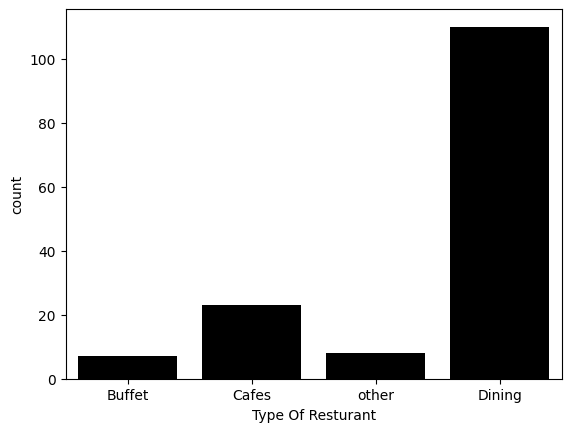

In [143]:
# Number Of Resturant 

number_of_resturant = len(df["res_name"].unique())

# Type Of Resturant
type_of_resturant = len(df["listed_in(type)"].unique())

c = ["r","b","y","k"]
sns.countplot(x=df["listed_in(type)"],color='k')
plt.xlabel("Type Of Resturant")

### **Conclusion 1 : Majority of the resturant falls in dinning category**

In [144]:
df.head(3)

,res_name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


In [145]:
groped_data = df.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({"votes":groped_data})
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Votes')

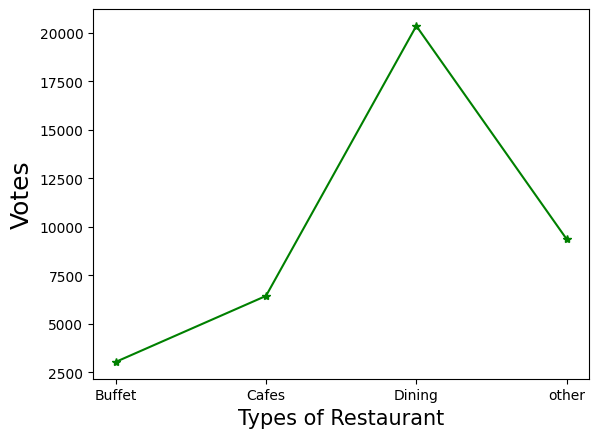

In [146]:
plt.plot(result,c='g',marker ="*")
plt.xlabel("Types of Restaurant", c ='k', size=15)
plt.ylabel("Votes", c = 'k',size=18)

### **Conclusion 2 : Dinning resturants has recieved maximum votes**

In [147]:
df.head()

,res_name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


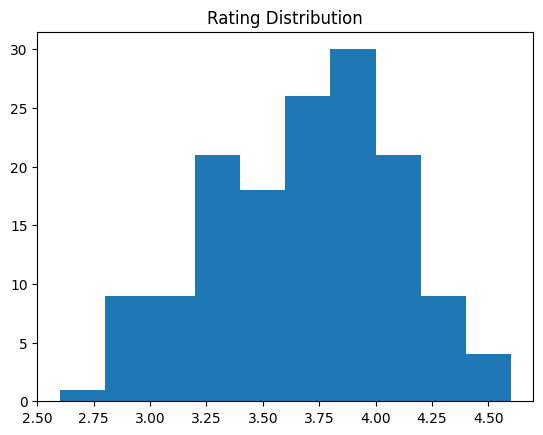

In [148]:
plt.hist(df["rate"],bins=10)
plt.title("Rating Distribution")
plt.show()

### **Conclusion 3 : The Majority resturants received ratings from 3.5 to 4**

#### Average order spending by couples 

In [149]:
df.head(2)

,res_name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

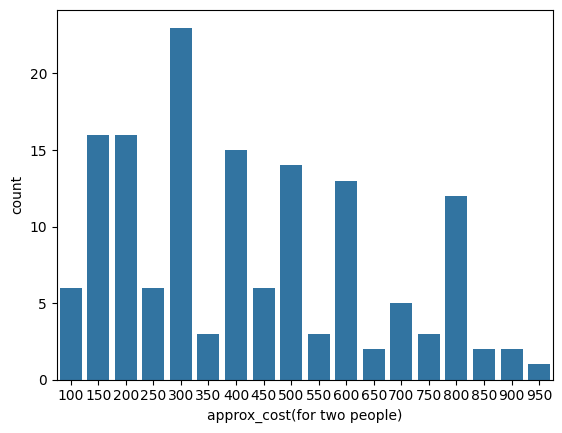

In [150]:
couple_data = df["approx_cost(for two people)"]
sns.countplot(x=couple_data)

### **Conclusion 4 : The Majority of couples preferr resturants with an approximate cost of 300 Rs.**

#### Which mode reveives maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

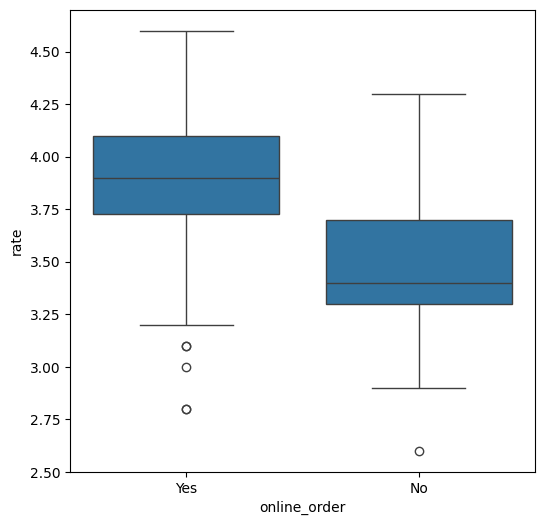

In [151]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order", y = "rate",data = df)

### **Conclusion 5: Offline order received lower rating in comparison to online order**

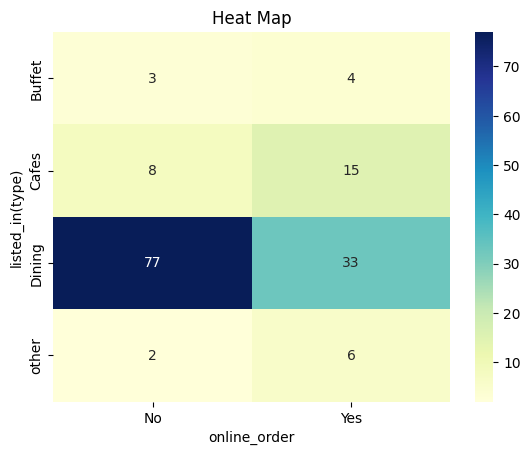

In [152]:
pivot_table = df.pivot_table(index="listed_in(type)",columns="online_order",aggfunc="size",fill_value=0)
pivot_table
sns.heatmap(pivot_table,annot=True, cmap="YlGnBu",fmt='d')
plt.title("Heat Map")

# plt.xlabel("Online Order")
plt.show()

### **Conclusion 6: Dining restaurants primarily accept offile orders, where as cafes primarily reeive online orders. This suggests that clients prefers orders in person at restaurants, but prefer online ordering at cafes**